In [22]:
import numpy as np
from imblearn.over_sampling import SMOTE
import torch
from collections import Counter

def read_ucr(filename):
    data = []
    labels = []
    label_set = set()  

    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            if len(parts) < 2:
                continue
            label = int(parts[-1].split(':')[-1])
            label_set.add(label)

 
    if label_set == {0, 1}: 
        def normalize(label):
            return label
    elif label_set == {1, 2}:  
        def normalize(label):
            return 0 if label == 1 else 1
    elif label_set == {-1, 1}:  
        def normalize(label):
            return 0 if label == -1 else 1
    else:
        raise ValueError(f"Unexpected label set: {label_set}")

    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            if len(parts) < 2:
                continue
            features = [float(f) for f in parts[:-1]]
            label = int(parts[-1].split(':')[-1])
            normalized_label = normalize(label)
            labels.append(normalized_label)
            data.append(features)

    print("Data loaded")
    return np.array(data), np.array(labels)




In [25]:
def read_ecg5000(filename):
    data = []
    labels = []
    
    def normalize(label):
        if label == 1:
            return 0  # Normal
        elif label in {2, 3, 4}:
            return 1  # Abnormal
        else:
            return None  

   
    with open(filename, 'r') as file:
        for line in file:
           
            parts = line.strip().split(':')
            features = list(map(float, parts[0].split(',')))
            label = int(parts[1])
           
            normalized_label = normalize(label)
            if normalized_label is not None:  
                data.append(features)
                labels.append(normalized_label)

    data = np.array(data)
    labels = np.array(labels)

    print("Data loaded")
    return np.array(data), np.array(labels)

Data loaded


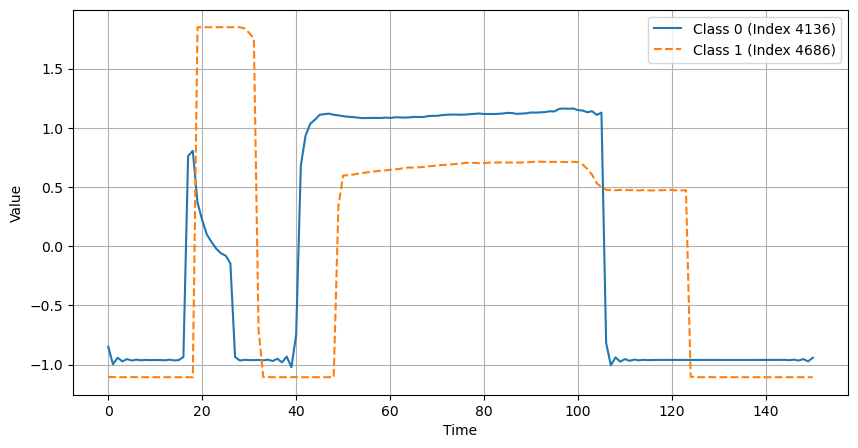

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import random

def plot_random_instances(data, labels):
    """
    Selects and plots two random time-series instances belonging to different classes.
    """
    # Ensure reproducibility with randomization each time function is called
    random.seed()  

    # Get indices of both classes
    class_0_indices = np.where(labels == 0)[0]
    class_1_indices = np.where(labels == 1)[0]

    if len(class_0_indices) == 0 or len(class_1_indices) == 0:
        print("Error: Dataset does not contain both classes.")
        return

    # Randomly select one instance from each class
    idx_0 = random.choice(class_0_indices)
    idx_1 = random.choice(class_1_indices)

    # Extract corresponding time-series data
    series_0 = data[idx_0]
    series_1 = data[idx_1]

    # Plot both series
    plt.figure(figsize=(10, 5))
    
    plt.plot(series_0, label=f"Class 0 (Index {idx_0})", linestyle='-')
    plt.plot(series_1, label=f"Class 1 (Index {idx_1})", linestyle='--')

    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
filename = "data/Wafer/Wafer_TEST.ts"  # Replace with the actual filename
data, labels = read_ucr(filename)  # Use read_ecg5000 if applicable
plot_random_instances(data, labels)


In [51]:
from collections import Counter

def print_class_distribution(labels):
    """
    Prints the class distribution in the dataset.

    Args:
        labels (array-like): Array of class labels.
    """
    class_counts = Counter(labels)
    total_samples = len(labels)
    
    print("Class Distribution:")
    for cls, count in class_counts.items():
        percentage = (count / total_samples) * 100
        print(f"Class {cls}: {count} samples ({percentage:.2f}%)")

# Example usage
# Assuming you have loaded data and labels using read_ucr or read_ecg5000
print_class_distribution(labels)


Class Distribution:
Class 1: 5499 samples (89.21%)
Class 0: 665 samples (10.79%)
